## Global Warming

The `temperature.csv` file contains a summary of the land monthly average high temperature in Celsius. The data was produced using the Berkeley Earth [[>](https://berkeleyearth.org/data/)] averaging method and covers the period from January 1850 to July 2023. The data set has the following columns:

+ column 1 : `year` 
+ column 2 : `month`
+ column 4 : `anomaly`
+ column 5 : `absolute`  

Anomalies represent the deviation from the average temperature for the period from January 1951 to December 1980 (14.39°C ± 0.09). The `absolute` column shows the monthly average temperature obtained by adding the average of 14.39°C to the anomalies.

### Imports

In [78]:
import numpy as np
import matplotlib.pyplot as plt

---
### Data

In [79]:
# load data and display info

data = np.loadtxt("./data/temperature.csv", delimiter=",", skiprows=1)

def info(data):
    print("shape: ", data.shape)
    print("years tracked: ", data.shape[0]//12)
    print("average temp: ", np.average(data[:,3]))
    print("average anomaly: ", np.average(data[:,2]))
    print("std temp", np.std(data[:,3]))
    print("std anomaly", np.std(data[:,2]))
    
info(data)

shape:  (2071, 4)
years tracked:  172
average temp:  14.435278126508935
average anomaly:  0.04527812650893289
std temp 0.6092977592601703
std anomaly 0.6092977592601703


---
### Visualizing the Temperature Time Series

Create a plot of the absolute temperatures. Set the x-axis ticks to display the years 1860, 1910, 1960, and 2010. Add a descriptive title and labels for both the x- and y-axis.

Text(0.5, 1.0, 'average Temperature in Berkely Earth from 1850-2022 for each month')

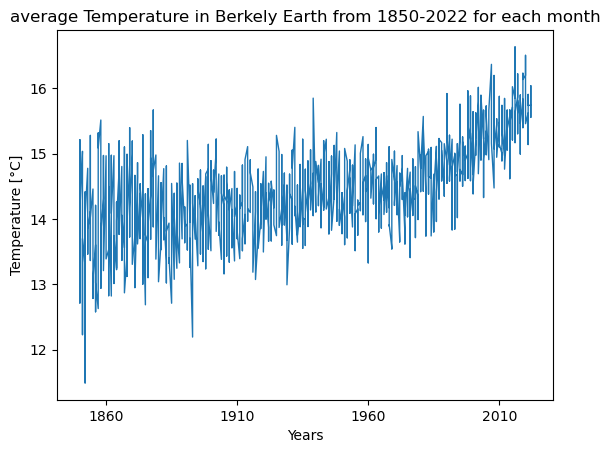

In [80]:
# code
plt.plot(data[:,0], data[:,3], lw=1)
plt.xticks([1860,1910,1960,2010])
plt.xlabel("Years")
plt.ylabel("Temperature [°C]")
plt.title("average Temperature in Berkely Earth from 1850-2022 for each month")

---
### Rolling Average of the Temperature

The previous plot shows that the temperature strongly oscillates, making it difficult to detect a trend. To address this issue, we can use a rolling average to smooth out the data.

A rolling average (moving average) calculates the average of a timeseries over a fixed number of consecutive time steps. For example, if we have a time series with daily data and we want to calculate a 7-day rolling average, we would take the average of the first 7 days, then the average of days 2-8, then days 3-9, and so on.

Write a function that returns a rolling average over k steps for a given time series. Write your own (slow) function with a for loop.

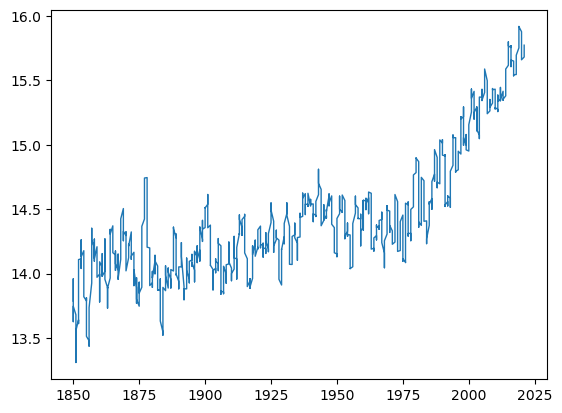

In [81]:
# code

def rolling_average(timeseries, data):
    timeseries *= 12
    smoothed = np.empty(shape=(data.shape[0]-timeseries, 2))
    for i in range(smoothed.shape[0]):
        smoothed[i] = (data[i,0], np.average(data[i:i+timeseries+1,3]))
    return smoothed
    
smoothed_temp = rolling_average(1, data)
plt.plot(smoothed_temp[:,0], smoothed_temp[:,1], lw=1)

---
### Visualizing Rolling Averages

Create a line plot to display the original temperature time series along with its rolling averages over 1, 10, and 30 years. Include a legend to distinguish between the different lines. Add a title, axis labels, and axis ticks as in the previous plot.

Text(0.5, 1.0, 'average Temperature in Berkely Earth from 1850-2022 for each month')

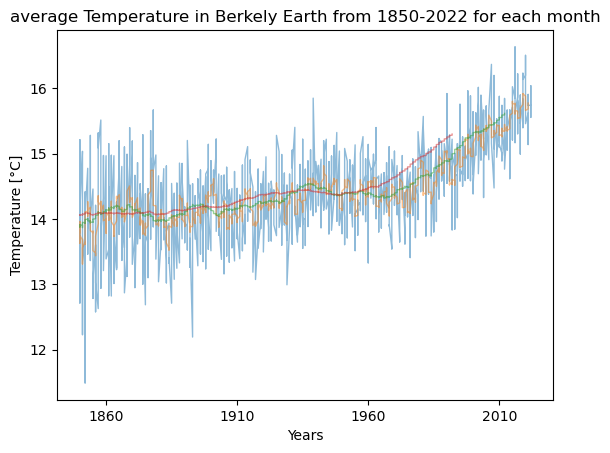

In [82]:
# code
smoothed1 = rolling_average(1, data)
smoothed10 = rolling_average(10, data)
smoothed30 = rolling_average(30, data)
plt.plot(data[:,0], data[:,3], lw=1, alpha=0.5)
plt.plot(smoothed1[:,0], smoothed1[:,1], lw=1, alpha=0.5)
plt.title("1")
plt.plot(smoothed10[:,0], smoothed10[:,1], lw=1, alpha=0.5)
plt.title("10")
plt.plot(smoothed30[:,0], smoothed30[:,1], lw=1, alpha=0.5)
plt.title("30")
plt.xticks([1860,1910,1960,2010])
plt.xlabel("Years")
plt.ylabel("Temperature [°C]")
plt.title("average Temperature in Berkely Earth from 1850-2022 for each month")

---
### Temperature Heatmap

Create a heatmap similar to the one shown below:

<img src="./imgs/heatmap.png" width="50%" height="50%">

In this heatmap, each column represents the 12 months of a year and each row represents a fixed month over all years between 1880 and 2022. Blue colors indicate lower temperatures and red colors indicate higher temperatures.

**Hints:**

- Remove the temperatures for the first month of the year 2023.

- Reshape the temperature time series into a matrix.

- Use `pyplot.imshow()` to display the matrix as an image. You can control the aspect ratio of the image using the `aspect` parameter and the coloring using a colormap. The colormap shown here is `coolwarm`. You can find an overview of colormaps in the [Matplotlib documentation](https://matplotlib.org/stable/tutorials/colors/colormaps.html). For more details on `pyplot.imshow()`, consult its [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html).

- Add a colorbar using `plt.colorbar(shrink=0.55)`. You can control the size of the colorbar using the optional `shrink` parameter.

In [83]:
# code